## RED NEURONAL: APLICACIÓN

In [1]:
!pip install numpy tensorflow matplotlib

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

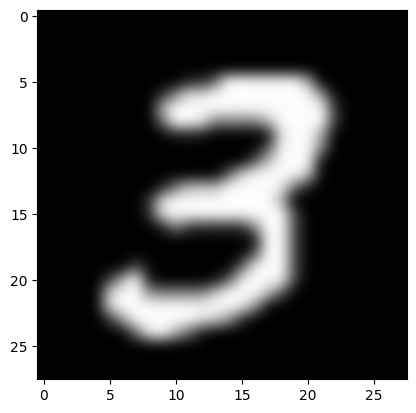

In [4]:
plt.imshow(train_images[7], cmap='gray', interpolation='bicubic')

In [5]:
train_images= train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [6]:
train_images[7]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [7]:
train_labels[7]

3

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
train_labels[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [10]:
model= models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
])
    

c:\Users\lucia\Desktop\UPGRADE_works\mi_entorno\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(layers.Flatten())

In [12]:
model.add(layers.Dense(64, activation='relu'))

In [13]:
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8615 - loss: 0.4555
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9818 - loss: 0.0606
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9888 - loss: 0.0363


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9835 - loss: 0.0462


In [17]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9868000149726868


In [18]:
model.save('mnist_model.h5')

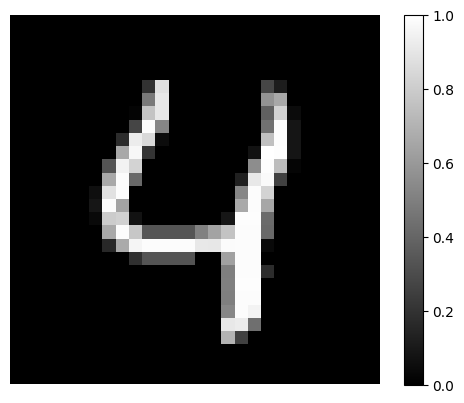

In [19]:
imagen= test_images[4].reshape(28, 28)
plt.imshow(imagen, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

In [20]:
test_images[4]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [21]:
from tensorflow.keras.models import load_model
import numpy as np

modelo_cargado = load_model('mnist_model.h5')

In [22]:
nueva_imagen = test_images[4]
nueva_imagen = np.expand_dims(nueva_imagen, axis=0)

In [23]:
predicción=modelo_cargado.predict(nueva_imagen)
dígito=np.argmax(predicción)
print(f'El modelo predice que el dígito es un: {dígito}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
El modelo predice que el dígito es un: 4


In [24]:
import netron
netron.start('mnist_model.h5')


Serving 'mnist_model.h5' at http://localhost:8080


('localhost', 8080)

In [25]:
import gradio as gr
import tensorflow as tf
import numpy as np

modelo = tf.keras.models.load_model("mnist_model.h5")

def clasificar_imagenes(img):
    img = np.reshape(img, (1, 28, 28, 1)).astype("float32") / 255
    predicciones = modelo.predict(img)
    digito_predicho = np.argmax(predicciones)
    return str(digito_predicho)

interfaz = gr.Interface(fn=clasificar_imagenes , inputs="sketchpad", outputs="label")
interfaz.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.50.2, however version 4.29.0 is available, please upgrade.
--------
